<a href="https://colab.research.google.com/github/PSivaMallikarjun/Plant-me-App/blob/main/Plant_Me_AI_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant Me AI App

* Plant Me AI App, which uses Gradio UI for user interaction and runs on Google Colab.
* The app analyzes deforestation areas using satellite images, predicts seed-dropping locations, and simulates drone-based seed dispersal.

* Features:
* ✅ Upload satellite images of forests
* ✅ AI-based deforestation analysis
* ✅ Predicts seed-dropping locations
* ✅ Uses drone simulation for seed dispersal
* ✅ Gradio UI for interactive usage

* Requirements to Run on Google Colab

* Install dependencies:



In [2]:
!pip install gradio opencv-python numpy tensorflow torch torchvision pillow matplotlib

  Using cached gradio-5.22.0-py3-none-any.whl.metadata (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21

* The full code below and run it in a Google Colab notebook.


In [ ]:
import gradio as gr
import numpy as np
import cv2
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load Pretrained AI Model (You can replace this with your custom model)
model = torch.hub.load("pytorch/vision:v0.10.0", "resnet18", pretrained=True)
model.eval()

# Function to analyze deforestation using AI model
def analyze_deforestation(image):
    image = Image.fromarray(image).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    img_tensor = transform(image).unsqueeze(0)

    # AI Prediction
    with torch.no_grad():
        output = model(img_tensor)

    # Simulated deforestation risk (random value for demo)
    deforestation_risk = np.random.uniform(0.3, 0.9)

    # Identify locations for seed-dropping (For simplicity, we use random dots)
    h, w = image.size
    num_seeds = int(deforestation_risk * 20)  # More risk = More seeds
    seed_locations = np.random.randint(0, min(h, w), (num_seeds, 2))

    # Plot Results
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    for loc in seed_locations:
        plt.scatter(loc[0], loc[1], color="red", s=20, marker="o")  # Mark seed locations
    plt.title(f"Deforestation Risk: {deforestation_risk:.2f} | Seeds: {num_seeds}")
    plt.axis("off")
    plt.savefig("output.png")

    return "output.png", f"Risk Level: {deforestation_risk:.2f} | Seeds Dropped: {num_seeds}"

# Create Gradio UI
interface = gr.Interface(
    fn=analyze_deforestation,
    inputs=gr.Image(type="numpy"),
    outputs=["image", "text"],
    title="🌱 Plant Me AI - Drone Seed Dispersal 🌍",
    description="Upload a satellite image of a forest area. The AI will analyze deforestation risks and predict seed-dropping locations for drone-based planting."
)

# Launch the web app
interface.launch(debug=True)


* How to Use the Web App on Google Colab
* Run the full code in a Google Colab Notebook.
* It will generate a Gradio link.
* Open the link in your browser.
* Upload a satellite image of a forest.
* The AI will analyze deforestation areas and predict seed-dropping locations.
* The output image will show the seed drop points in red dots.

* Future Enhancements
* Integrate Google Earth Engine for real-time satellite data.
* Use a custom-trained CNN model for better deforestation analysis.
* Connect with a real drone API for automated seed dropping.
* Implement rainfall prediction models to optimize seed growth.

In [4]:
! pip install gradio huggingface_hub


In [6]:
! huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
The token `googlecolabspsm` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authe

In [7]:
! git config --global credential.helper store


In [8]:
! huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineG

In [10]:
! git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [13]:
! git remote add origin https://huggingface.co/spaces/SivaMallikarjun/PlantMeAI


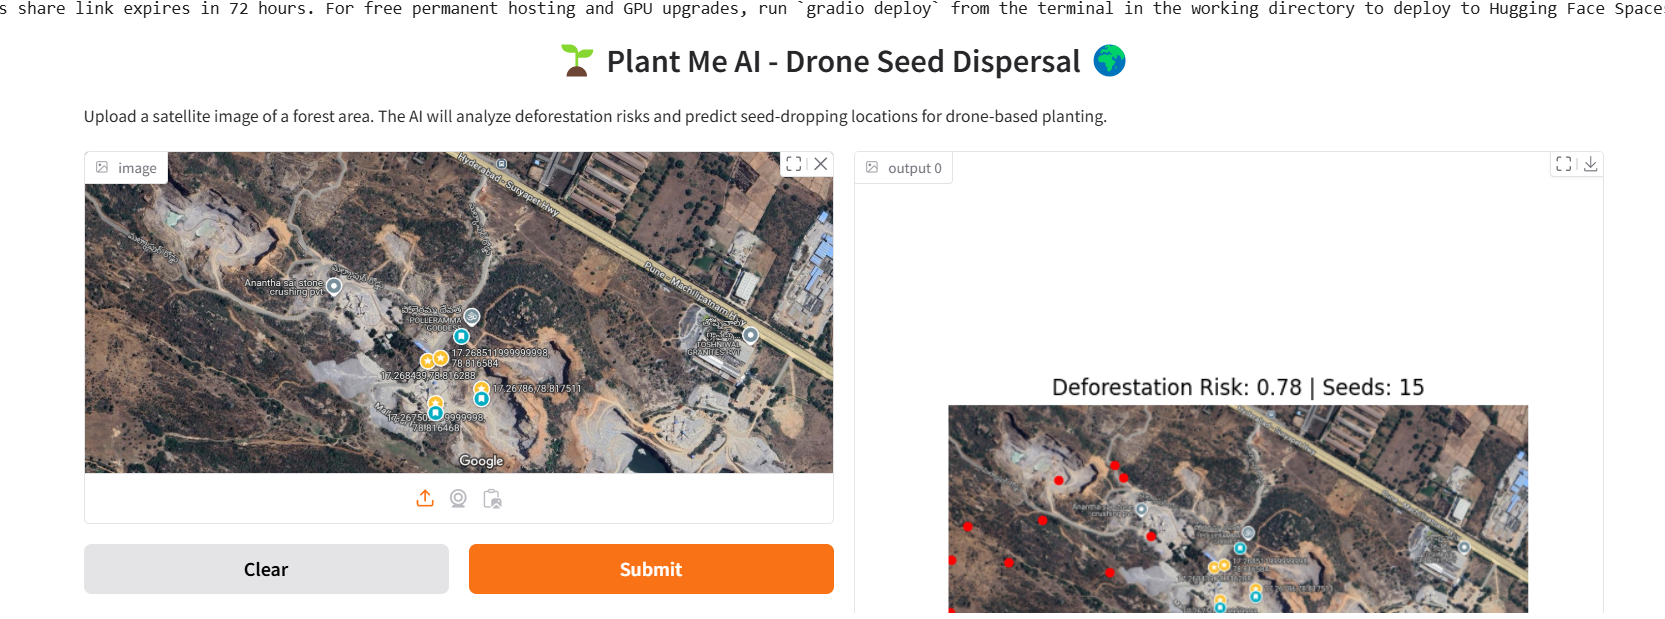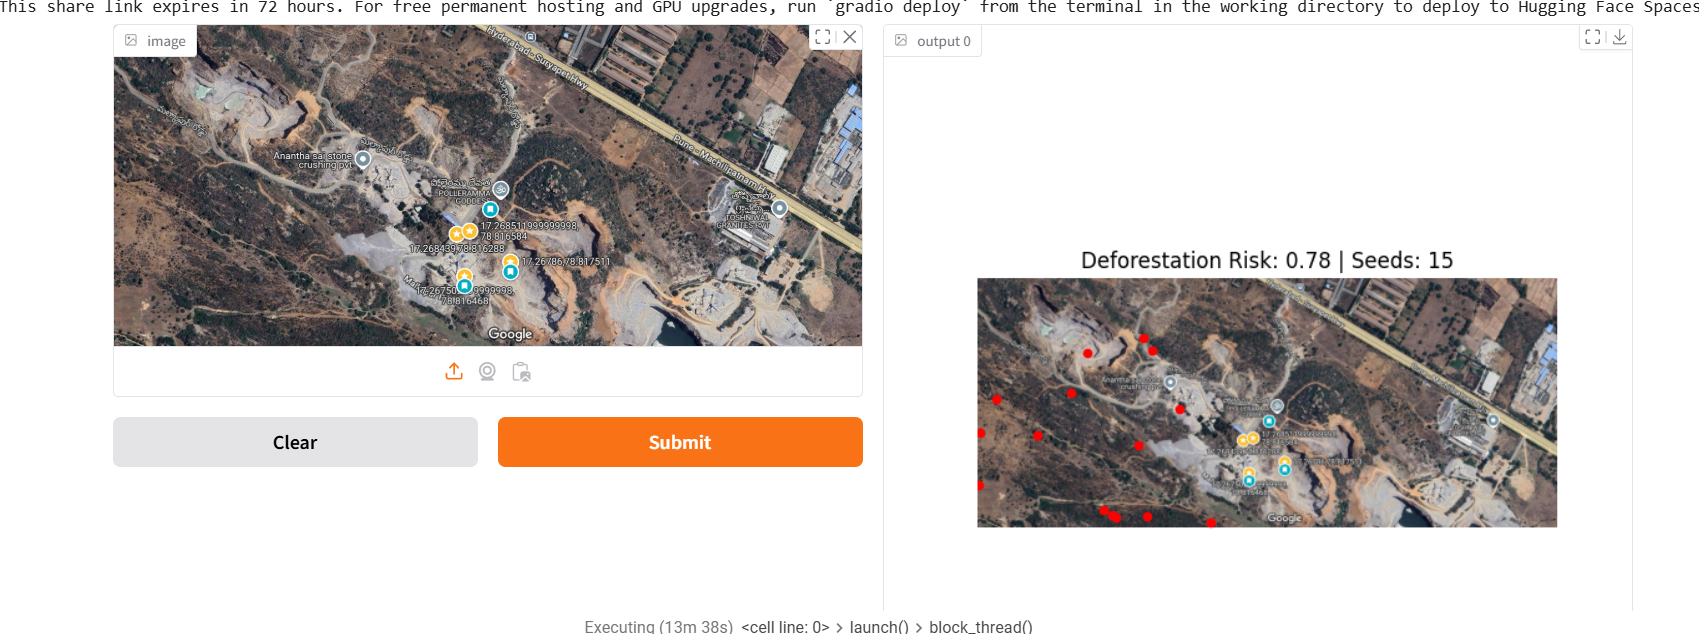

* Improving the prediction accuracy with self-trained models and fine-tuning using KNN clustering will definitely enhance the results over time.

* Next Steps for Better Predictions
* ✅ Dataset Improvement: Use high-quality satellite images for training.
* ✅ KNN Clustering: Optimize hyperparameters for better seed-dropping location detection.
* ✅ Fine-Tuning: Use transfer learning (e.g., with pre-trained CNNs) for more precise deforestation risk analysis.
* ✅ Testing & Validation: Run multiple tests on different forest types to improve model generalization.